# KPI 2 - Relative Racecraft Performance - EDA and Hypothesis Testing

Load dataset used in kpi 2.1 into 2.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
df = pd.read_csv("/Users/frankdong/Documents/Analytics Local/williams-racing-strategies/processed_data/williams-deltas-by-sector-type.csv")

In [3]:
df.head()

,Unnamed: 0,year,race,sector,sector_delta,pct_slower,fastest_team,sector_type,circuit_type,zscore
0,0,2018,Italian Grand Prix,1,0.251,0.934,Racing Point,power,power,-1.079077
1,1,2018,Italian Grand Prix,2,0.146,0.539,Renault,power,power,-1.394782
2,2,2018,Italian Grand Prix,3,0.454,1.704,Haas F1 Team,power,power,-0.468713
3,3,2018,Monaco Grand Prix,1,0.110,0.581,Renault,technical,technical,-1.503023
4,4,2018,Monaco Grand Prix,2,0.430,1.272,Force India,technical,technical,-0.540875



EDA - let the data speak for itself through visualisations. 
Get to know the data both visually and statistically, lay the groundwork for analysis and hypothesis testing.
### 1. Start with core, rough visualisations. 
Histograms, boxplots, violin plots, scatterplots, barplots.  
### 2. Save all interesting "candidate" plots, output and save by exporting as PNG for review.
Plots may reveal surprising outliers, odd clusters, or clear trends
### 3. Annotate and document observations in Markdown
Write brief markdown notes next to each PNG. Note patterns, anomalies, large/small group sizes, etc.
### 4. Identify outliers, check sample sizes, assess normality. 
Key for hypothesis testing - boxplots and histograms help spot outliers and skew.
Check sample sizes with .groupby() or .value_counts() - are all groups (teams, circuits, years) large enough# for statistical tests?
### 5. Iterate and refine EDA
Select the most informative charts for polish, annotation, and inclusion in Tableau


## Steps 1, 2, 3. start with rough vizs, save interesting plots, and annotate observations

### 1: Delta boxplot of grid delta by sector 

Set up new figure and size - taller boxplot helps compare heights 

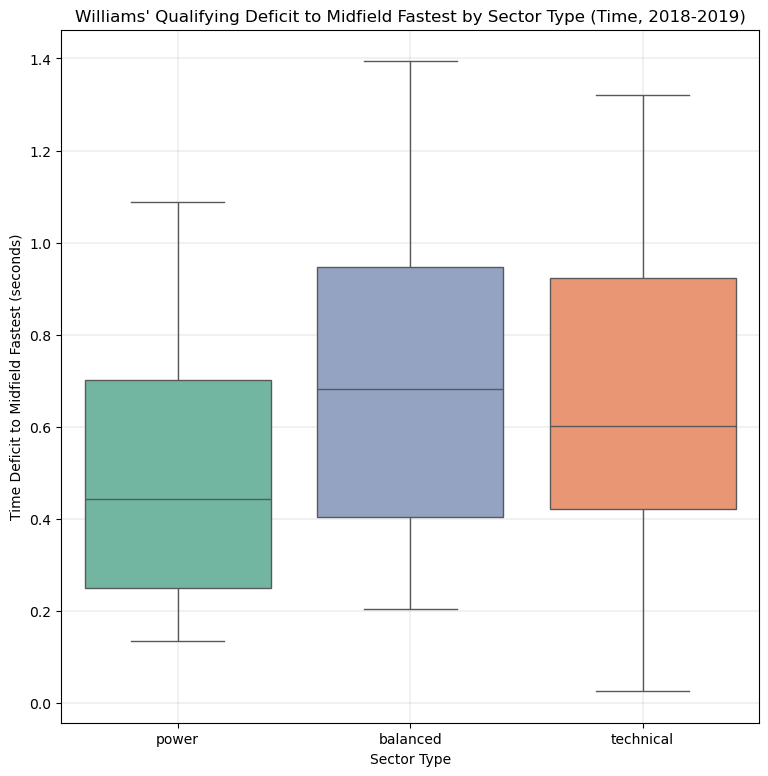

In [4]:
# a taller boxplot helps compare heights
plt.figure(figsize=(9, 9))

sector_delta_boxplot = sns.boxplot(
    x = 'sector_type', 
    y = 'sector_delta', 
    data = df, 
    hue = 'sector_type', 
    palette = 'Set2', # unbiased colour set for boxplot visualisation
    order = ['power', 'balanced', 'technical'] # order the boxes this way
)

# set title, xlabel and ylabel
sector_delta_boxplot.set_title("Williams' Qualifying Deficit to Midfield Fastest by Sector Type (Time, 2018-2019)")
sector_delta_boxplot.set_xlabel('Sector Type')
sector_delta_boxplot.set_ylabel('Time Deficit to Midfield Fastest (seconds)')

plt.grid(linewidth = 0.25)
plt.show()

A boxplot summarises how Williams' qualifying sector deficits—time lost versus the fastest midfield team—are distributed across different sector types.

- The box captures the middle 50% of performances (the interquartile range, or IQR), while the median line indicates the typical time lost for each sector type.
- Whiskers extend to include most other values, and any dots (if present) represent outlying results.

Power sectors show the smallest and most consistent qualifying deficits, 
with a tight range and a median around 0.45 seconds.

Technical sectors have the second largest median deficit (about 0.6s) and the widest range, 
highlighting differing performance outcomes and potentially greater setup challenges.

Balanced sectors surprisingly display the largest variability and maximum time lost (up to ~1.4s). 

This could reflect subjective labeling of sector types or underline William' particular struggles to find the optimal balance between top speed and downforce.

No outliers present. 


### 2. Percentage delta boxplot by sector

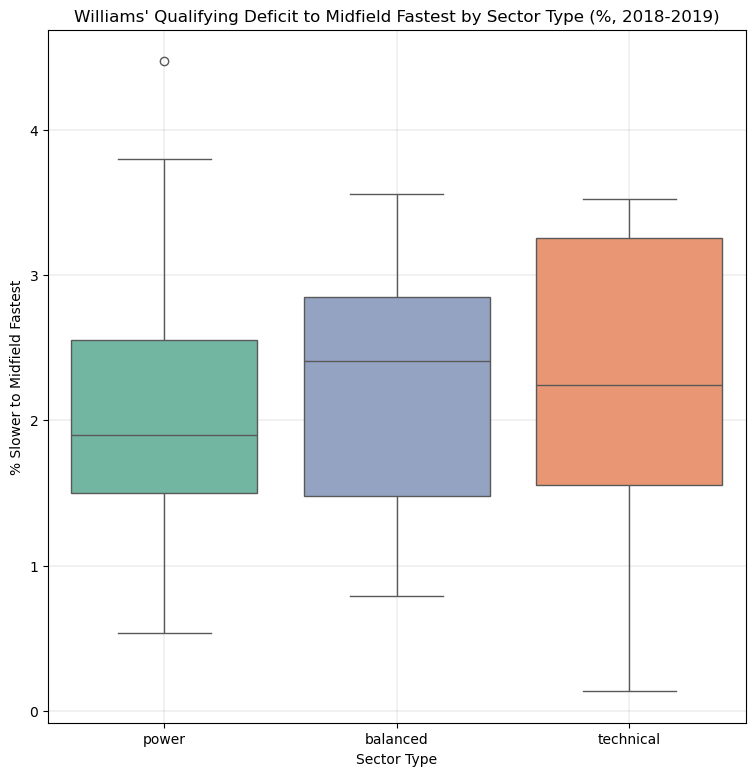

In [5]:
plt.figure(figsize=(9, 9))

sector_percentage_delta_boxplot = sns.boxplot(
    x = 'sector_type', 
    y = 'pct_slower', 
    data = df, 
    hue = 'sector_type', 
    palette = 'Set2', # unbiased colour set for boxplot visualisation
    order = ['power', 'balanced', 'technical'] # order the boxes this way
)

sector_percentage_delta_boxplot.set_title("Williams' Qualifying Deficit to Midfield Fastest by Sector Type (%, 2018-2019)")
sector_percentage_delta_boxplot.set_xlabel('Sector Type')
sector_percentage_delta_boxplot.set_ylabel('% Slower to Midfield Fastest')

plt.grid(linewidth = 0.25)
plt.show()

This boxplot compares qualifying sector times in relative terms compared to the fastest 
midfield team, offering an additional perspective on where and how competitive gaps open up.

Power sectors again show the smallest median relative deficit (~2%) and the tightest IQR.

There is noticeable relative variability in power sectors, spanning a wide range, and an
outlier around 4.46%. This should be kept in mind when interpreting test results or considering data cleaning.

Balanced sectors now exhibit less volatility in relative terms compared to absolute times, 
with a consistently narrow band of percentage deficits. 

Technical sectors demonstrate the largest variability within the IQR. However, the gap is capped at approximately +3.5%, 
and, in encouraging moments, Williams nearly matches the fastest midfield team with a minimum deficit near +0.15%.


**Conclusion**

Both charts confirm power sectors are Williams' comparative stronghold, with the smallest
and most stable time losses. 

Technical and balanced sectors introduce greater unpredictability, and at times, larger
performance gaps - possibly pointing to either difficulties in setup or sector labelling. 


### 3. Histograms to check for normality - absolute 

Plot a grid of histograms, with each of the three representing the sector type

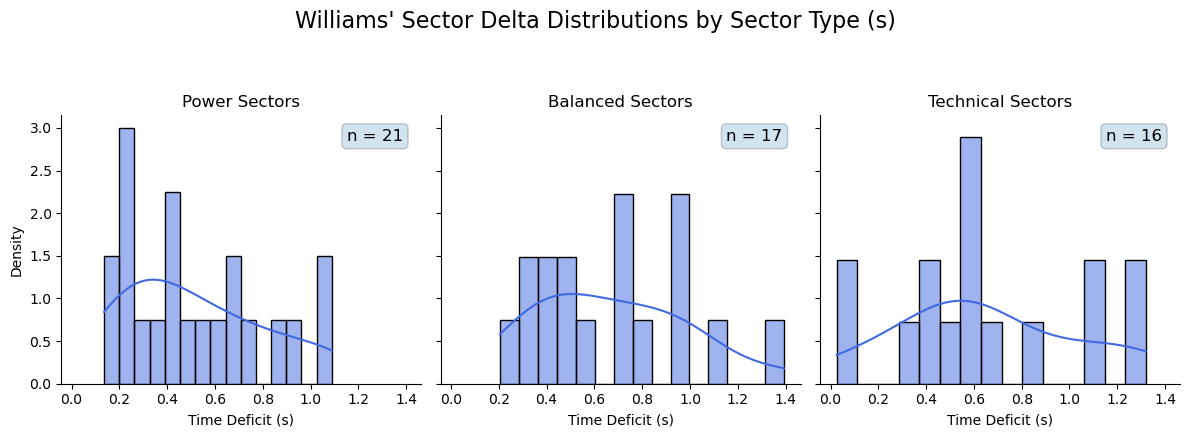

In [6]:
grid = sns.FacetGrid(
    df, 
    col = 'sector_type', 
    col_order = ['power', 'balanced', 'technical'],
    sharex = True, sharey = True, 
    height = 4, aspect = 1
)
grid.map(
    sns.histplot, 
    'sector_delta', 
    kde=True, 
    stat='density', 
    bins=15, 
    color='royalblue'
)

# annotate counts to each plot on the grid
for ax, sector in zip(grid.axes.flat, ['power', 'balanced', 'technical']):
    n = df[df['sector_type'] == sector].shape[0]
    ax.text(0.95, 0.95, f'n = {n}', ha='right', va='top', transform=ax.transAxes,
            fontsize=12, bbox=dict(boxstyle='round', alpha=0.2))
    ax.set_xlabel('Time Deficit (s)')
    ax.set_ylabel('Density')
    ax.set_title(f'{sector.capitalize()} Sectors')

plt.suptitle("Williams' Sector Delta Distributions by Sector Type (s)", y=1.08, fontsize=16)
plt.tight_layout()
plt.show()

### 4. Histograms to check for normality - relative 

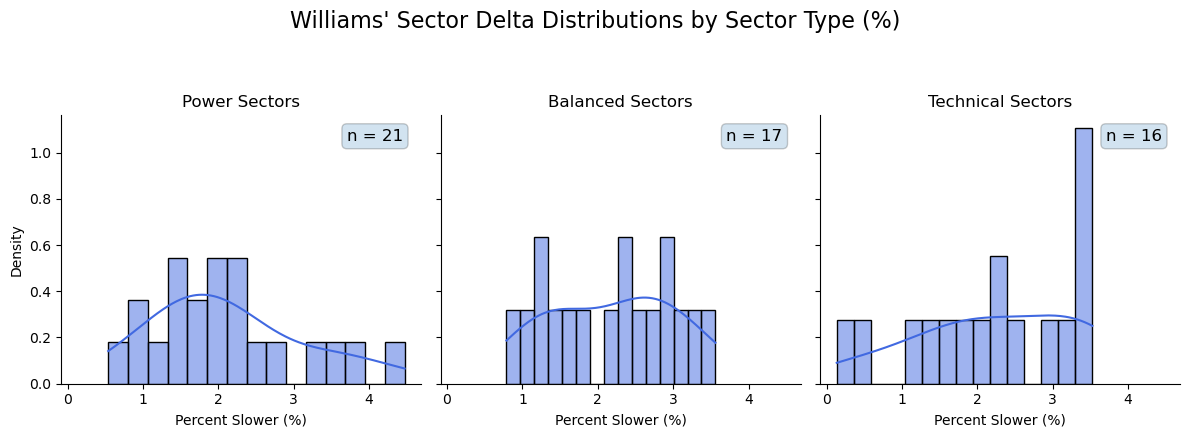

In [7]:
# plot a grid of histograms, with each of the three representing the sector type
grid = sns.FacetGrid(
    df, 
    col = 'sector_type', 
    col_order = ['power', 'balanced', 'technical'],
    sharex = True, sharey = True, 
    height = 4, aspect = 1
)
grid.map(
    sns.histplot, 
    'pct_slower', 
    kde=True, 
    stat='density', 
    bins=15, 
    color='royalblue'
)

# annotate counts to each plot on the grid

for ax, sector in zip(grid.axes.flat, ['power', 'balanced', 'technical']):
    n = df[df['sector_type'] == sector].shape[0]
    ax.text(0.95, 0.95, f'n = {n}', ha='right', va='top', transform=ax.transAxes,
            fontsize=12, bbox=dict(boxstyle='round', alpha=0.2))
    ax.set_xlabel('Percent Slower (%)')
    ax.set_ylabel('Density')
    ax.set_title(f'{sector.capitalize()} Sectors')

plt.suptitle("Williams' Sector Delta Distributions by Sector Type (%)", y=1.08, fontsize=16)
plt.tight_layout()
plt.show()

For both plots, 

- Sample Size: (P: 21, B: 17, T: 16). 
    > Since none exceed n = 30, we cannot rely on the Central Limit Theorem to justify standard parametric tests like the t-test.
- Outliers: 
    > No obvious outliers present in the first grid. 
    > Technical sectors in the second '% relative' plot seems skewed by a denser x = +3.4%.
- Shape: 
    > All three sector types show some skew and multimodal patterns. 
    > Especially for balanced and technical sectors, distributions don't follow typical, classic bell-curve shapes. 

**Conclusion:**
- Mann-Whitney U test probably the best choice to compare Williams' sector time deficits, 
particularly between technical and power sectors. 
- Test works well without assuming normality or large n. Also robust to small samples and 
subtle data quirks. 


## Step 4. Perform hypothesis testing

In [8]:
# count samples for each group at technical and power sectors
sample_counts = df['sector_type'].value_counts()
print("Sample sizes for each sector: \n", sample_counts)

Sample sizes for each sector: 
 sector_type
power        21
balanced     17
technical    16
Name: count, dtype: int64


nP, nB, nT < 30.

We will perform a Mann-Whitney U test - a non-parametric alternative to a t-test. 

This ensures robustness given small sample sizes and multimodal, non-normal samples. 

Note results and obserations at a 95% level. 

**Hypothesis Recap:**
Compare Williams' absolute qualifying sector deficits to the fastest midfield team  
between technical and power sectors during 2018-2019.
Groups:  
- Power sectors: n = 21  
- Technical sectors: n = 16  
- Two independent populations representing sector types.
We are testing whether the deficits in technical sectors are significantly worse (larger) than those in power sectors,  
focusing on one direction because of the hypothesis that technical sectors reveal greater performance limitations.

**Test type:**  
A two-sample, independent, one-tailed test to determine if  
Williams' mean absolute deficit in technical sectors is significantly greater than in power sectors.
Hypotheses:  
- Null (H0): μ_technical ≤ μ_power (Deficits in technical sectors are not greater than in power sectors)  
- Alternative (H1): μ_technical > μ_power (Deficits in technical sectors are greater than in power sectors)


### 1. Absolute deficits (s)

1. extract relevant data for the test

In [9]:
technical_deficits = df[df['sector_type'] == 'technical']['sector_delta']
power_deficits = df[df['sector_type'] == 'power']['sector_delta']

2. run the mann-whitney u test

In [10]:
m_stat, p_value = mannwhitneyu(technical_deficits, power_deficits, alternative = "greater")

In [11]:
print("\nMann-Whitney U Test for technical vs. power absolute sector deficits at 95% confidence level.\n")
print(f"Mann-Whitney U statistic: {m_stat:.3f}")
print(f"One-tailed p-value: {p_value:.4f}")


Mann-Whitney U Test for technical vs. power absolute sector deficits at 95% confidence level.

Mann-Whitney U statistic: 204.000
One-tailed p-value: 0.1382


In [12]:
alpha = 0.05 # 95% confidence level

In [13]:
if p_value < alpha:
    print("\nReject the null hypothesis (H1): Williams' qualifying deficit in technical sectors is significantly greater than in power sectors.")
else: # p_value_one_tailed >= alpha
    print("\nFail to reject the null hypothesis (H0): There is no significant evidence that Williams' qualifying deficit in technical sectors is greater than in power sectors.")


Fail to reject the null hypothesis (H0): There is no significant evidence that Williams' qualifying deficit in technical sectors is greater than in power sectors.


Mann-Whitney U Test for technical vs. power absolute sector deficits at 95% confidence level.

Mann-Whitney U statistic: 204.000

One-tailed p-value: 0.1382

Fail to reject the null hypothesis (H0): There is no significant evidence that Williams' qualifying deficit in technical sectors is greater than in power sectors.

---
While our data sample suggests a trend towards larger deficits in technical sectors, the current sample size
and variability mean we cannot confidently state that Williams struggles more in technical sectors compared to 
power sectors based on qualifying sector times. 
This invites further analysis, with additional data, alternative metrics, or complementary performance angles, 
like driver experience or consistency - which is explored in SQ/KPI 3. 


### 2. Relative deficits (%)

1. Filter out the outlier

In [14]:
df_pct = df[df['pct_slower'] < 4.471] # filters out the one pct_slower value of 4.471 in power sectors

2. Extract relevant data

In [15]:
pct_technical = df_pct[df_pct['sector_type'] == 'technical']['pct_slower']
pct_power = df_pct[df_pct['sector_type'] == 'power']['pct_slower']

3. Perform Mann-Whitney U Test (one-tailed, technical > power)

In [16]:
m_stat, p_value = mannwhitneyu(pct_technical, pct_power, alternative="greater")

4. Print results

In [17]:
print("\n\nMann-Whitney U Test for technical vs. power '% slower' at 95% confidence level.\n")
print(f"Mann-Whitney U statistic: {m_stat:.3f}")
print(f"One-tailed p-value: {p_value:.4f}")



Mann-Whitney U Test for technical vs. power '% slower' at 95% confidence level.

Mann-Whitney U statistic: 181.000
One-tailed p-value: 0.2570


In [18]:
alpha = 0.05  # significance level

In [19]:
if p_value < alpha:
    print("\nReject the null hypothesis (H1): Williams was significantly slower in technical sectors (as % behind fastest midfield).")
else:
    print("\nFail to reject the null hypothesis (H0): No significant evidence Williams was slower in technical sectors (as % behind fastest midfield).")


Fail to reject the null hypothesis (H0): No significant evidence Williams was slower in technical sectors (as % behind fastest midfield).


Mann-Whitney U Test for technical vs. power '% slower' at 95% confidence level.

Mann-Whitney U statistic: 181.000

One-tailed p-value: 0.2570

Fail to reject the null hypothesis (H0): No significant evidence Williams was slower in technical sectors (as % behind fastest midfield).

---
The relative performance gap, measured in % behind the fastest midfield team, did not reach statistical significance. 
This suggests: 
> While limitations may exist, they weren't consistently large enough to be confirmed in this sample. 
> Williams' deficits in power and technical sectors may have been more evenly distributed than expected
> Otherwise, the small sample size, n < 30, may not offer enough power to detect small, but real differences. 

Nonetheless, this trend invites further investigation, possibly using a broader time period or cross-validating with
driver performance, complementing racecraft performance. 


### Step 5: Further visualisations 



Main variables of interest are: 
- sector_delta (absolute deficit in seconds)
- pct_slower (relative deficit, percentage slower behind fastest)
- sector_type (power, balanced, or technical)
- race, sector, fastest_team
As H0 is the way to go - we are looking for charts that help with storytelling leverage. 


1. Heatmap - avg % slower by sector type and sector number

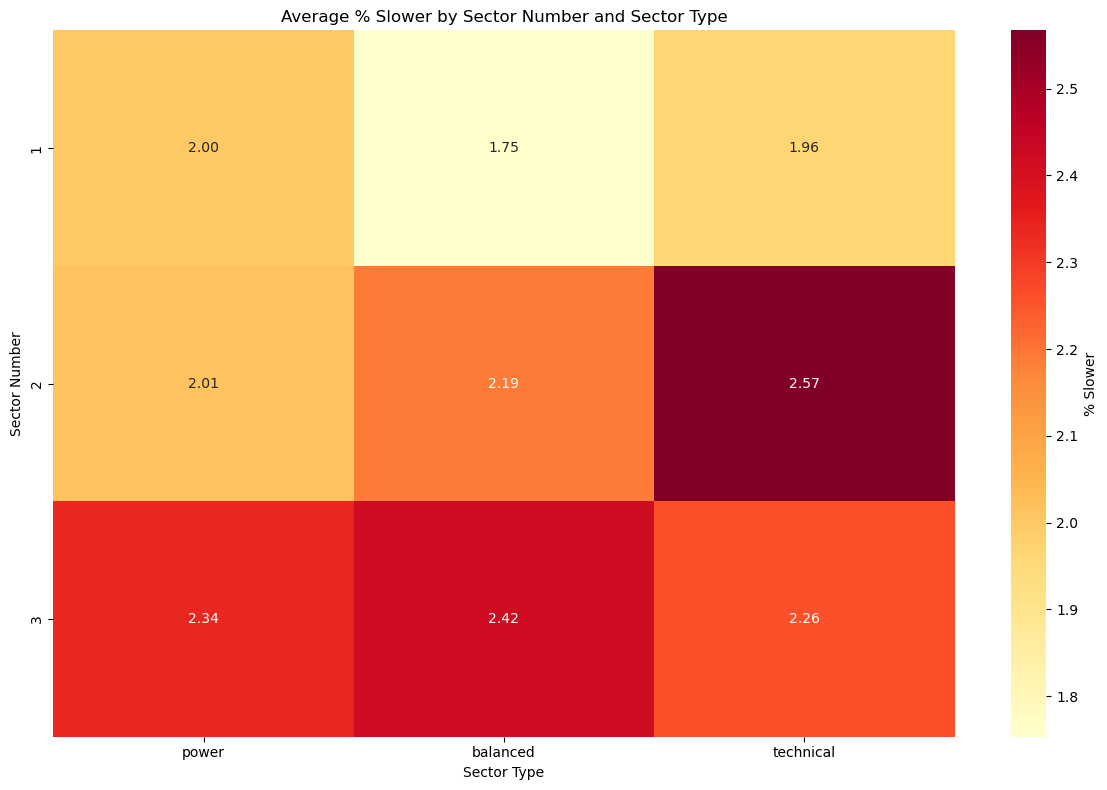

In [20]:
pivot = df.pivot_table(index="sector", columns="sector_type", values="pct_slower", aggfunc="mean")

pivot = pivot[['power', 'balanced', 'technical']]

plt.figure(figsize = (12, 8))

sectors_heatmap = sns.heatmap(
    data = pivot, 
    annot = True, 
    cmap = "YlOrRd", 
    fmt = ".2f", 
    cbar_kws = {'label': '% Slower'} # labels the colour bar on the side
)

sectors_heatmap.set_title("Average % Slower by Sector Number and Sector Type")
sectors_heatmap.set_xlabel("Sector Type")
sectors_heatmap.set_ylabel("Sector Number")

plt.tight_layout()
plt.show()

2. strip plot - view individual performances per sector type

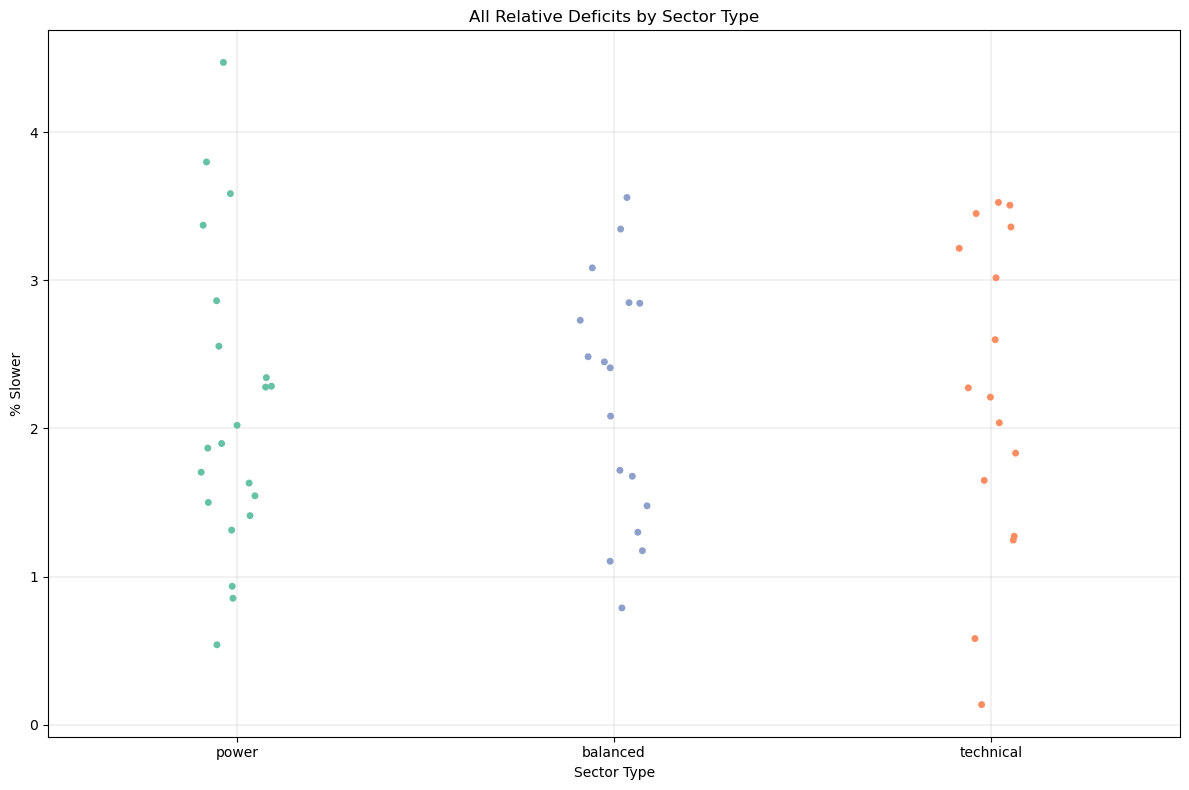

In [21]:
plt.figure(figsize = (12, 8))

sector_stripplot = sns.stripplot(
    data = df, 
    x = 'sector_type', 
    y = 'pct_slower', 
    hue = 'sector_type',
    palette = 'Set2', 
    order = ['power', 'balanced', 'technical']
)

sector_stripplot.set_title("All Relative Deficits by Sector Type")
sector_stripplot.set_xlabel("Sector Type")
sector_stripplot.set_ylabel("% Slower")

plt.grid(linewidth = 0.25)
plt.tight_layout()
plt.show()



Stripplots are great for identifying individual race performances, but also give us a sense of the number of values considered in the data. 
Here, it's very apparent there's not enough entries in each segment. 


3. violin plot - view distribution shape per sector type

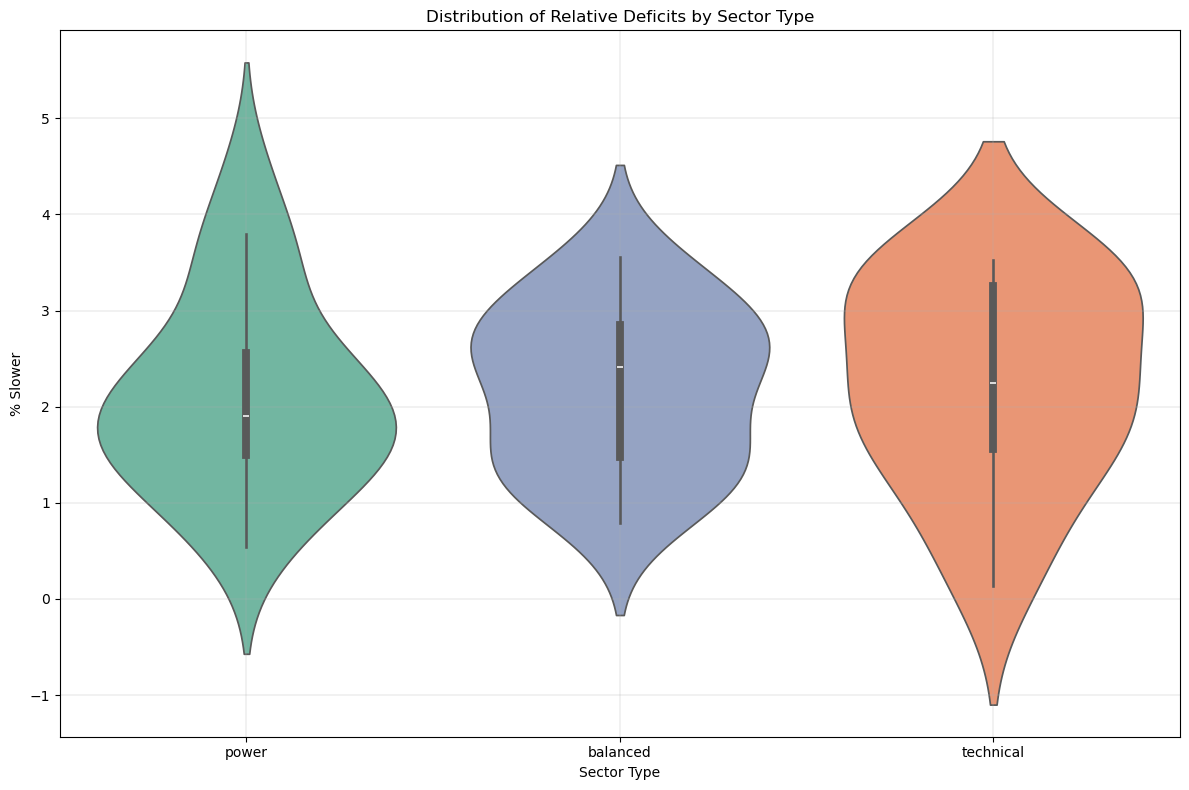

In [22]:
plt.figure(figsize = (12, 8))

sector_violinplot = sns.violinplot(
    data = df, 
    x = 'sector_type', 
    y = 'pct_slower', 
    hue = 'sector_type',
    palette = 'Set2', 
    order = ['power', 'balanced', 'technical']
)

sector_violinplot.set_title("Distribution of Relative Deficits by Sector Type")
sector_violinplot.set_xlabel("Sector Type")
sector_violinplot.set_ylabel("% Slower")

plt.grid(linewidth = 0.25)
plt.tight_layout()
plt.show()



This sort of plot helps us identify distributions, combining KDEs and boxplots. 
However, the granularity of seeing individual performances is now lost. 


4. barchart - average relative deficit per race - grouped by sector type

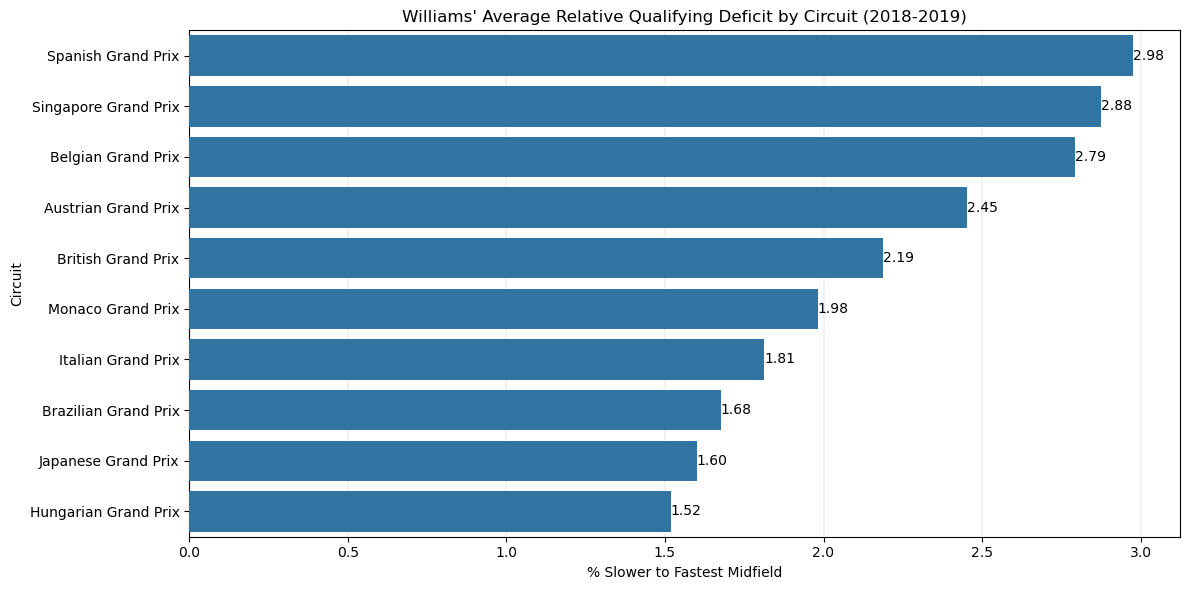

In [23]:
grouped = df.groupby('race')['pct_slower'].mean().sort_values(ascending = False).reset_index() # form a new groupby dataframe

plt.figure(figsize = (12, 6))

barchart = sns.barplot(
    data = grouped, 
    x = 'pct_slower', 
    y = 'race', 
    zorder = 3 # place bars over the gridlines
)

# create rounded labels as strings with 2 decimal places
labels = [f"{x:.2f}" for x in grouped['pct_slower']]
barchart.bar_label(barchart.containers[0], labels=labels, fontsize=10)

barchart.set_title("Williams' Average Relative Qualifying Deficit by Circuit (2018-2019)")
barchart.set_xlabel("% Slower to Fastest Midfield")
barchart.set_ylabel("Circuit")

plt.grid(linewidth = 0.25, axis = 'x', zorder = 0) # vertical lines only, behind the bars. 
plt.tight_layout()
plt.show()

5. barchart - average absolute deficit per race - grouped by sector type

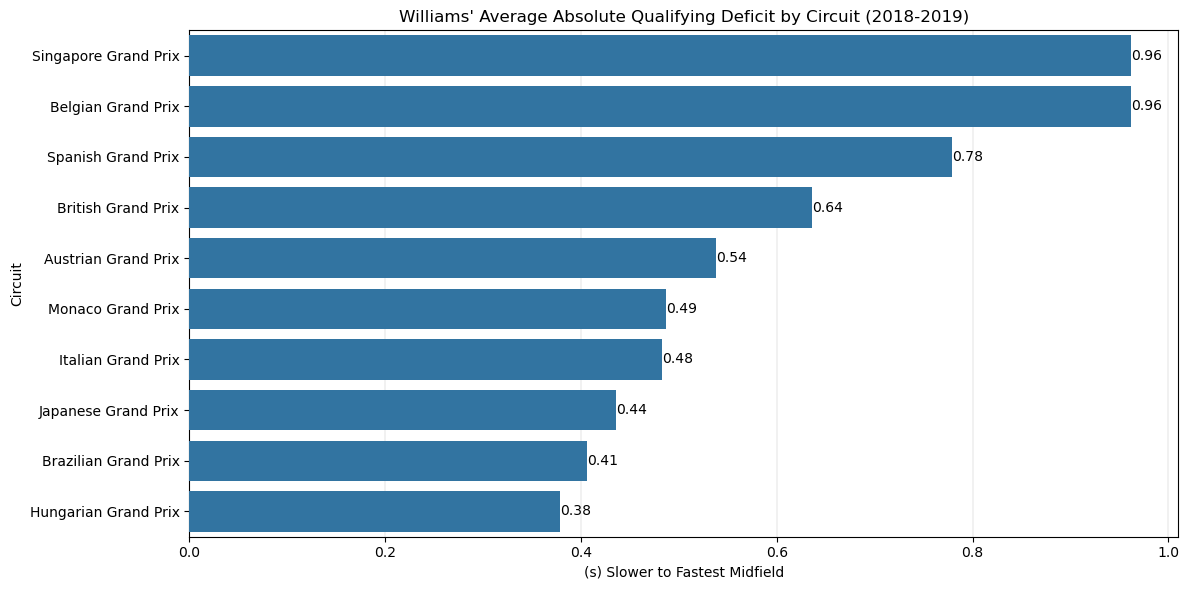

In [24]:
grouped = df.groupby('race')['sector_delta'].mean().sort_values(ascending = False).reset_index() # form a new groupby dataframe

plt.figure(figsize = (12, 6))

barchart = sns.barplot(
    data = grouped, 
    x = 'sector_delta', 
    y = 'race', 
    zorder = 3 # place bars over the gridlines
)

# create rounded labels as strings with 2 decimal places

labels = [f"{x:.2f}" for x in grouped['sector_delta']]
barchart.bar_label(barchart.containers[0], labels=labels, fontsize=10)

barchart.set_title("Williams' Average Absolute Qualifying Deficit by Circuit (2018-2019)")
barchart.set_xlabel("(s) Slower to Fastest Midfield")
barchart.set_ylabel("Circuit")

plt.grid(linewidth = 0.25, axis = 'x', zorder = 0) # vertical lines only, behind the bars. 
plt.tight_layout()
plt.show()

### 6. Countplot - find the most frequent fastest rivals, and by what sector types

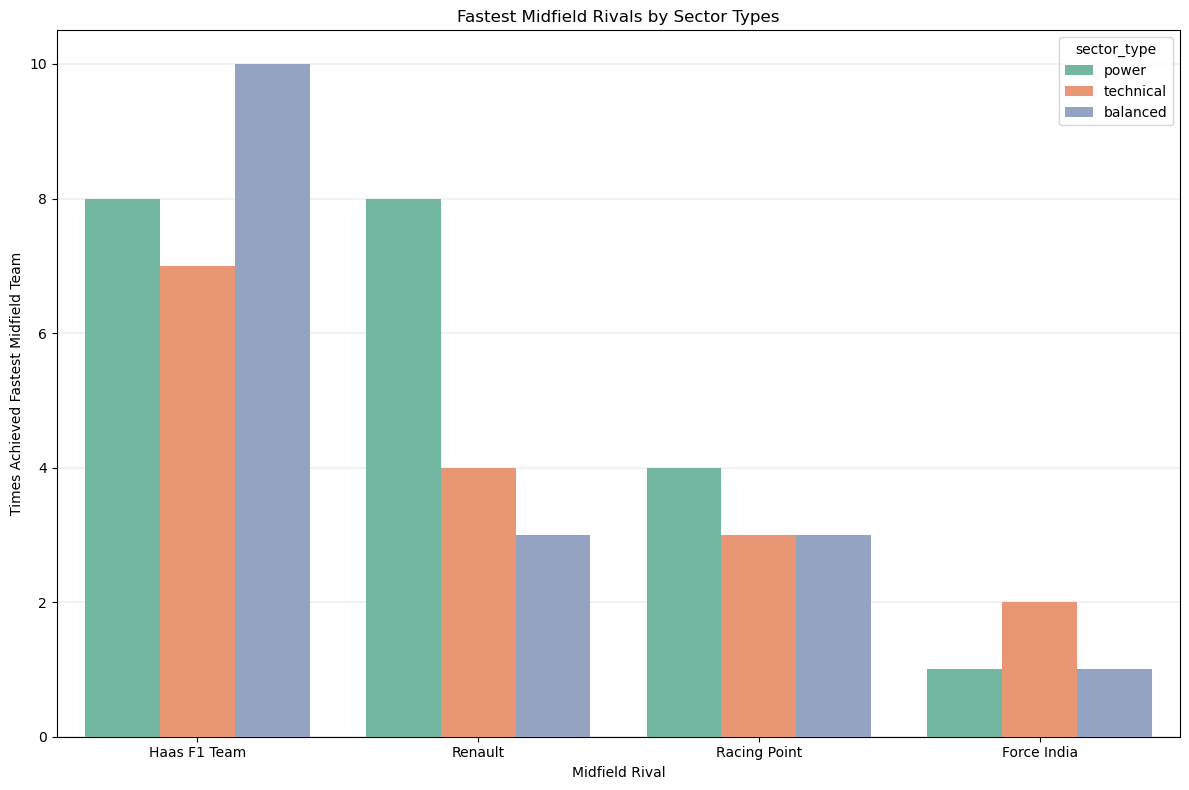

In [25]:
plt.figure(figsize = (12, 8))

teams_countplot = sns.countplot(
    data=df, 
    x="fastest_team", 
    hue="sector_type", 
    palette = 'Set2',
    order=df['fastest_team'].value_counts().index, # sorts in the correct order automatically, before printing results
    zorder = 3
)

teams_countplot.set_title("Fastest Midfield Rivals by Sector Types")
teams_countplot.set_xlabel("Midfield Rival")
teams_countplot.set_ylabel("Times Achieved Fastest Midfield Team")

plt.tight_layout()
plt.grid(linewidth = 0.25, axis = 'y', zorder = 1)
plt.show()